# Exploring Changes in Phoenix Biodiversity

*Author: Haylee Oyler*

[Link to GitHub repository](https://github.com/haylee360/phoenix-biodiversity)

## About

#### Purpose
Part one of this analysis explores the change in air quality in Santa Barbara county during the 2017 Thomas Fire. The Thomas Fire was one of the regions largest fires to date, burning over 280,000 acres in Ventura and Santa Barbara counties in December 2017. It caused widespread ecological damage, displaced communities, and left lasting environmental impacts. Additionally, wildfire smoke is a strong trigger for respiratory diseases such as asthma. One way to measure wildfire's environmental health effects is through air quality.

The air quality index (AQI) is a measure of how clean or polluted the air is and what associated health effects might be a concern. It is a scale that ranges from 0-500 with 0-50 being good, 151-200 being unhealth, and 301-500 being hazardous.

Part 1 will using AQI data to the explore the Thomas Fire's effects on air quality and environmental health in Santa Barbara County.

#### Highlights
Import AQI data using pandas
Explore and clean AQI data using pandas
Filter AQI data to Santa Barbara county during the Thomas Fire using pandas
Calculate a rolling 5 day average AQI using pandas
Visualize the AQI over time during the Thomas Fire using matplotlib

#### About the Data
This analysis uses data from the Air Quality Index Daily Values Report which provides daily AQI values for a specified year and location. We're working with two data sets daily_aqi_by_county_2017 and daily_aqi_by_county_2018. These contain daily AQI values for U.S. counties in 2017 and 2018 respectively. The Thomas Fire occurred in December of 2017, so we've selected data before and after the fire to see a clear picture of its effect on air quality.

#### References
Air Quality Index (AQI) from US Environmental Protection Agency.

US Environmental Protection Agency. Air Quality System Data Mart AirNow available via https://www.epa.gov/outdoor-air-quality-data. Accessed October 17 2024.

#### Acknowledgements
All materials were created by Carmen Galaz-Garcia for EDS-220: Working with Environmental Data.

In [1]:
# Load packages 
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rioxr
import contextily as cx

from pystac_client import Client  # To access STAC catalogs

import planetary_computer  # To sign items from the MPC STAC catalog 

from IPython.display import Image  # To nicely display images


# Import arizona county boundaries data
arizona_boundaries = gpd.read_file(os.path.join("data", "tl_2020_04_cousub.shp"))

## Access the MPC catalog and explore

In [2]:
# Access MPC catalog
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [3]:
# Explore catalog metadata
print('Title:', catalog.title)
print('Description:', catalog.description)

Title: Microsoft Planetary Computer STAC API
Description: Searchable spatiotemporal metadata describing Earth science datasets hosted by the Microsoft Planetary Computer


In [4]:
catalog.get_collections()

<generator object Client.get_collections at 0x172593bc0>

In [5]:
# Get collections and print their names
collections = list(catalog.get_collections())  # Turn generator into list

print('Number of collections:', len(collections))

print("Collections IDs (first 10):")
for i in range(10):
    print('-', collections[i].id)

Number of collections: 124
Collections IDs (first 10):
- daymet-annual-pr
- daymet-daily-hi
- 3dep-seamless
- 3dep-lidar-dsm
- fia
- sentinel-1-rtc
- gridmet
- daymet-annual-na
- daymet-monthly-na
- daymet-annual-hi


## Define parameters for our search

In [6]:
# Temporal range of interest
time_range = "2017-01-01/2023-01-01"


# bounding box (as a GeoJSON)
bbox = {
    "type": "Polygon",
    "coordinates":[
        [
            [-112.826843, 33.863574],
            [-112.826843, 32.974108],
            [-111.184387, 32.974108],
            [-111.184387, 33.863574],
            [-112.826843, 33.863574]
        ]
    ],
}


In [7]:
# Catalog search
search = catalog.search(
    collections = ['io-biodiversity'],
    intersects = bbox,
    datetime = time_range)
search

In [8]:
# Retrieve search items
items = search.item_collection()
items

In [9]:
# Get first item in the catalog search
item = items[0]
item2 = items[1]
item3 = items[2]
item4 = items[3]


In [10]:
# Print item ID and properties
print('ID:' , item.id)
item4.properties

ID: bii_2020_34.74464974521749_-115.38597824385106_cog


{'datetime': None,
 'proj:epsg': 4326,
 'proj:shape': [7992, 7992],
 'end_datetime': '2017-12-31T23:59:59Z',
 'proj:transform': [0.0008983152841195215,
  0.0,
  -115.38597824385106,
  0.0,
  -0.0008983152841195215,
  34.74464974521749,
  0.0,
  0.0,
  1.0],
 'start_datetime': '2017-01-01T00:00:00Z'}

In [11]:
item4.assets

{'data': <Asset href=https://pcdata01euw.blob.core.windows.net/impact/bii-v1/bii_2017/bii_2017_34.74464974521749_-115.38597824385106_cog.tif?st=2024-12-04T01%3A26%3A36Z&se=2024-12-05T02%3A11%3A36Z&sp=rl&sv=2024-05-04&sr=c&skoid=9c8ff44a-6a2c-4dfb-b298-1c9212f64d9a&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2024-12-03T21%3A03%3A14Z&ske=2024-12-10T21%3A03%3A14Z&sks=b&skv=2024-05-04&sig=OUh%2B1/7Z4WGJdVHy06tnYxr9RiYi7QEGuO16HHTebYQ%3D>,
 'tilejson': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/tilejson.json?collection=io-biodiversity&item=bii_2017_34.74464974521749_-115.38597824385106_cog&assets=data&tile_format=png&colormap_name=io-bii&rescale=0%2C1&expression=0.97%2A%28data_b1%2A%2A3.84%29&format=png>,
 'rendered_preview': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=io-biodiversity&item=bii_2017_34.74464974521749_-115.38597824385106_cog&assets=data&tile_format=png&colormap_name=io-bii&rescale=0%2C1&expression=0.

In [12]:
# Plot rendered preview
Image(url=item.assets['rendered_preview'].href, width=500)

## Load data

In [13]:
phoenix_2017 = rioxr.open_rasterio(item.assets['data'].href)
phoenix_2017

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [14]:
phoenix_shp = arizona_boundaries[arizona_boundaries['NAME'] == 'Phoenix']

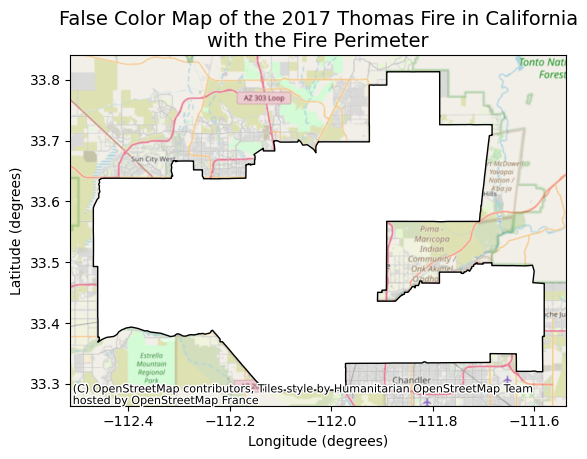

In [15]:
# Initialize figure
fig, ax = plt.subplots()

#Plot STAC data
phoenix_shp.plot(ax=ax,
                color='white',
                edgecolor='black')

# Plot background data
cx.add_basemap(ax=ax, crs=arizona_boundaries.crs)

# Set title and axes labels
ax.set_title('False Color Map of the 2017 Thomas Fire in California\nwith the Fire Perimeter',
            fontsize=14)
ax.set_xlabel('Longitude (degrees)')
ax.set_ylabel('Latitude (degrees)')

plt.show()

In [16]:
phoenix_shp = phoenix_shp.to_crs('EPSG:4326')

In [17]:
phoenix_shp.geometry
phoenix_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
assert phoenix_2017.rio.crs == phoenix_shp.crs

In [19]:
step1 = phoenix_2017.rio.clip(*phoenix_shp.total_bounds)

CRSError: Invalid projection: EPSG:33.29026177608856: (Internal Proj Error: proj_create: crs not found: EPSG:33.29026177608856)

In [ ]:
# phoenix_2017_clip = (phoenix_2017.rio.clip(*phoenix_shp.total_bounds)
#                     .rio.clip(phoenix_shp.geometry)
#                     )

# phoenix_2017_clip